In [1]:
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import os
import sys




fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all),(x_test,y_test) = fashion_mnist.load_data()
x_valid,x_train = x_train_all[:5000],x_train_all[5000:]
y_valid,y_train = y_train_all[:5000],y_train_all[5000:]

print("归一化前的最大值和最小值",np.max(x_train),np.min(x_train))

#  数据归一化处理
# x = (x - u ) / std
# u 是均值 std 是方差 如此便得到了 均值是0 方差是 1 的正态分布了

#用到了sklearn的api
# from sklearn.preprocessing import StandardScaler 

#初始化一个 scaler对象 
# scaler = StandardScaler()
#x_train: [None,28,28] -> [None,784] -> [-1,28,28]
# x_train_scaled = scaler.fit_transform(x_train.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
#验证集 不需要做fit fit：是在训练集上得到均值和方差 把 均值和方差记录下来 因为做归一化的时候 是需要用训练集的均值和方差去做的 
# x_valid_scaled = scaler.transform(x_valid.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
#测试集
# x_test_scaled = scaler.transform(x_test.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)


# print("归一化之后的最大值和最小值",np.max(x_train_scaled),np.min(x_train_scaled))

#神经网络定义方式 
# 1 ， 四层神经网略
"""
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28,28]))
model.add(tf.keras.layers.Dense(300,activation='sigmoid'))
model.add(tf.keras.layers.Dense(100,activation='sigmoid'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

"""
#另外一种网络模型搭建的写法
# model = tf.keras.models.Sequential([
# #     tf.keras.layers.Dense(300,activation='sigmoid'),
# #     tf.keras.layers.Dense(100,activation='sigmoid'),
# #     tf.keras.layers.Dense(10,activation='softmax')
# # ])

# 多层神经wnaglu网略

#relu : y = max(0,x)
model = tf.keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape = [28,28]))
for  _ in range(20):
    # selu： 自带归一化的激励函数
    model.add(keras.layers.Dense(100,activation = "selu"))
    #批归一化 两种 
    #1 ，在激励函数之后
#     model.add(keras.layers.BatchNormalization())
    # 2 激励函数之前 归一化 
    """
    model.add(keras.layers.Dense(100))
    model.add(keras.layers.BatchNomallization())
    model.add(keras.layers.Activation("relu"))
    
    """
model.add(keras.layers.Dense(10,activation = "softmax"))



model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])



归一化前的最大值和最小值 255 0


数据标准化（归一化）处理是数据挖掘的一项基础工作，不同评价指标往往具有不同的量纲和量纲单位，这样的情况会影响到数据分析的结果，为了消除指标之间的量纲影响，需要进行数据标准化处理，以解决数据指标之间的可比性。原始数据经过数据标准化处理后，各指标处于同一数量级，适合进行综合对比评价。

https://blog.csdn.net/haoji007/article/details/81157224

In [2]:
#评估效果  
#model.evaluate(x_test_scaled,y_test)

In [3]:
#查看模型概况
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               1

TensorBoard是一个可视化工具，它可以用来展示网络图、张量的指标变化、张量的分布情况等。特别是在训练网络的时候，我们可以设置不同的参数（比如：权重W、偏置B、卷积层数、全连接层数等），使用TensorBoader可以很直观的帮我们进行参数的选择。


earlystopping 当我们训练深度学习神经网络的时候通常希望能获得最好的泛化性能（generalization performance，即可以很好地拟合数据）。但是所有的标准深度学习神经网络结构如全连接多层感知机都很容易过拟合：当网络在训练集上表现越来越好，错误率越来越低的时候，实际上在某一刻，它在测试集的表现已经开始变差。
Modelcheckpoint  该回调函数将在每个epoch后保存模型到filepath 使用keras搭建模型，训练时验证集上val_acc达到1了，但在测试数据集上面模型还没有完全收敛。由于在ModelCheckpoint的参数设置时设置了仅保留最佳模型，导致无法保存最新的更好的模型。

In [4]:
#回调函数  Tensorboard ,earlystopping ,Modelcheckpoint 

logdir =  os.path.join("callbacks_lian_deep_jl")
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir,"fashion_mnist_model.h5")

callbacks  = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file,save_base_only = True),
    keras.callbacks.EarlyStopping(patience = 5,min_delta = 1e-3)
]
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid),callbacks = callbacks)

# plot_learning_curves(history)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 13s 233us/sample - loss: 0.7483 - accuracy: 0.7261 - val_loss: 0.5712 - val_accuracy: 0.7916
Epoch 2/10
55000/55000 [==============================] - 10s 189us/sample - loss: 0.4893 - accuracy: 0.8215 - val_loss: 0.4386 - val_accuracy: 0.8456
Epoch 3/10
55000/55000 [==============================] - 10s 188us/sample - loss: 0.4319 - accuracy: 0.8434 - val_loss: 0.4046 - val_accuracy: 0.8508
Epoch 4/10
55000/55000 [==============================] - 11s 192us/sample - loss: 0.3994 - accuracy: 0.8536 - val_loss: 0.3806 - val_accuracy: 0.8630
Epoch 5/10
55000/55000 [==============================] - 10s 185us/sample - loss: 0.3738 - accuracy: 0.8634 - val_loss: 0.3837 - val_accuracy: 0.8586
Epoch 6/10
55000/55000 [==============================] - 11s 192us/sample - loss: 0.3543 - accuracy: 0.8697 - val_loss: 0.3707 - val_accuracy: 0.8658
Epoch 7/10
55000/55000 [=====================

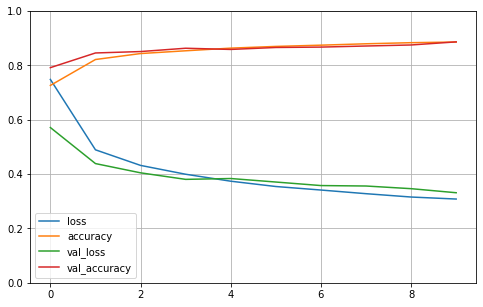

In [5]:
def plot_learning_curves(history):

    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()


plot_learning_curves(history)
# 博主 平滑 原因
# 参数众多 训练不充分
# 梯度消失 -》链式法则-》复合函数f（g（x）） 后因前果 导致 训练次数较少时 不显示变化 
#皮归一化 缓解 梯度消失